In [19]:
import pandas as pd

cars = pd.read_excel('cars.xlsx')
cars.head(5)
X = cars.iloc[:, 1:-1]
#remove brand and model from this dataframe to make an model without them
X.drop(['model','brand'], axis=1, inplace=True)
y = cars.iloc[:, -1]

#using min max scaler to normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scalling only the numerical columns of the data
scaled_df = pd.DataFrame(scaler.fit_transform(X[['age', 'funding_amount', 'fundingPercent', 'month_payment', 'payment_duration', 'car_price']]),
                        columns=['age', 'funding_amount', 'fundingPercent', 'month_payment', 'payment_duration', 'car_price'])
#adding the non-scaled columns to the scaled data
X = pd.merge(left=scaled_df,
             right=X.drop(['age', 'funding_amount', 'fundingPercent','month_payment', 'payment_duration', 'car_price'], axis=1),
             left_index=True, right_index=True)     
X.head(5)





,age,funding_amount,fundingPercent,month_payment,payment_duration,car_price,is_male,isNew,isWorkCar,isSUV,seatsAmount
0,0.569444,0.029819,0.602728,0.027283,0.108391,0.028672,0,0,0,0,5
1,0.388889,0.123058,0.547101,0.066877,0.205604,0.142765,1,0,1,0,7
2,0.263889,0.114716,0.771206,0.066193,0.191048,0.095131,0,1,1,1,5
3,0.222222,0.087074,0.758205,0.038851,0.253743,0.072156,1,1,0,1,5
4,0.152778,0.056197,0.811594,0.027090,0.227646,0.041263,0,1,0,0,5


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
#splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
#gradient boosting classifier model with default parameters
gb=GradientBoostingClassifier(n_estimators=100,random_state=1234,learning_rate=0.1)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy for gradient boosting with default parameters is :",accuracy_score(y_test,y_pred))

accuracy for gradient boosting with default parameters is : 0.6958026828212894


In [21]:
#finding the best amount of estimators for the model
acc=[]
from tqdm import tqdm
for i in tqdm(range(1,100)):
    gb=GradientBoostingClassifier(n_estimators=i,random_state=1234,learning_rate=0.1)
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
#print the best amount of estimators for the model by finding the max accuracy
print(acc.index(max(acc))+1)
maxAccIndex=acc.index(max(acc))+1


100%|██████████| 99/99 [01:22<00:00,  1.20it/s]

73


In [22]:
#finding the best learning rate for the model
lr=[]
for i in tqdm(range(1,31)):
    gb=GradientBoostingClassifier(n_estimators=maxAccIndex,random_state=1234,learning_rate=i*0.01)
    gb.fit(x_train,y_train)
    prob=gb.predict_proba(x_test)
    y_pred=gb.predict(x_test)
    lr.append(accuracy_score(y_test,y_pred))
#print the best learning rate for the model by finding the max accuracy
print(lr.index(max(lr))*0.01+0.01,max(lr))
bestLr=lr.index(max(lr))*0.01+0.01



100%|██████████| 30/30 [00:37<00:00,  1.24s/it]

0.17 0.7070532237126785


In [23]:
#gradient boosting classifier model with best parameters
gb=GradientBoostingClassifier(n_estimators=maxAccIndex,random_state=1234,learning_rate=bestLr)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(f"The accuracy for the gradient boosting model with the best parameters that we have found is : {acc}")
#print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

The accuracy for the gradient boosting model with the best parameters that we have found is : 0.7070532237126785
[[941 394]
 [283 693]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1335
           1       0.64      0.71      0.67       976

    accuracy                           0.71      2311
   macro avg       0.70      0.71      0.70      2311
weighted avg       0.71      0.71      0.71      2311



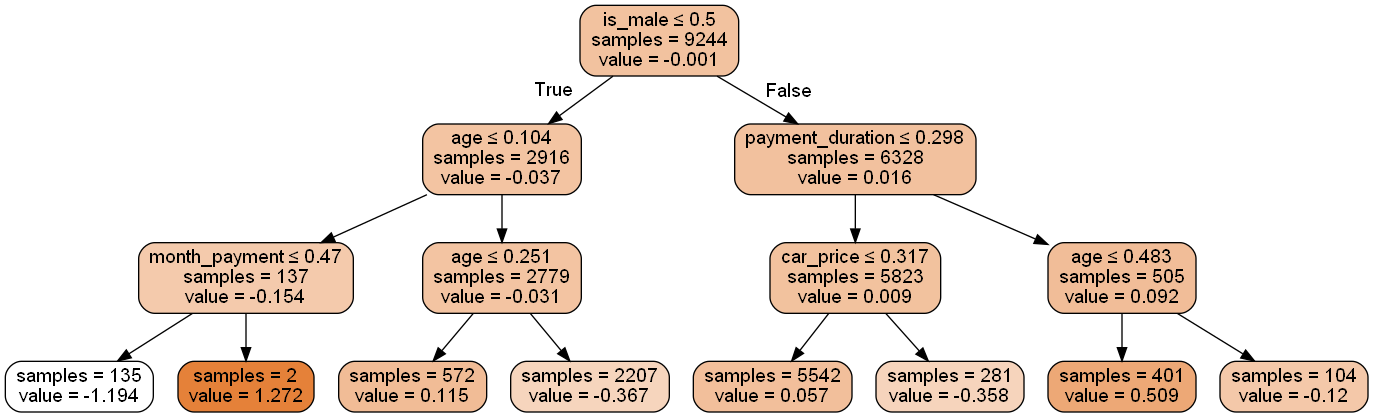

In [24]:
# plot one of the model decision trees to see how it is built and how it is split up 
from IPython.display import Image
from pydotplus import graph_from_dot_data
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz

sub_tree = gb.estimators_[11, 0]

# Visualization of the tree
dot_data = export_graphviz(
    sub_tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True, feature_names=X.columns,
    proportion=False, impurity=False,  # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [25]:
#knn models based on 1 to 30 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    print('KNN: ', i, 'Accuracy: ', accuracy_score(y_test, pred))



KNN:  1 Accuracy:  0.6265685850281264
KNN:  2 Accuracy:  0.6213760276936391
KNN:  3 Accuracy:  0.6482042405884898
KNN:  4 Accuracy:  0.6412808308091735
KNN:  5 Accuracy:  0.646906101254868
KNN:  6 Accuracy:  0.6495023799221117
KNN:  7 Accuracy:  0.656425789701428
KNN:  8 Accuracy:  0.6525313717005625
KNN:  9 Accuracy:  0.6655127650367806
KNN:  10 Accuracy:  0.6585893552574643
KNN:  11 Accuracy:  0.6637819125919515
KNN:  12 Accuracy:  0.6620510601471224
KNN:  13 Accuracy:  0.6681090437040242
KNN:  14 Accuracy:  0.6681090437040242
KNN:  15 Accuracy:  0.669407183037646
KNN:  16 Accuracy:  0.6737343141497187
KNN:  17 Accuracy:  0.6698398961488533
KNN:  18 Accuracy:  0.6681090437040242
KNN:  19 Accuracy:  0.6745997403721333
KNN:  20 Accuracy:  0.6672436174816097
KNN:  21 Accuracy:  0.6663781912591952
KNN:  22 Accuracy:  0.6624837732583297
KNN:  23 Accuracy:  0.6646473388143661
KNN:  24 Accuracy:  0.6637819125919515
KNN:  25 Accuracy:  0.667676330592817
KNN:  26 Accuracy:  0.6650800519255733

In [26]:
#random forest model 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1234)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)


0.6685417568152315

In [27]:
#naive bayes model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.6655127650367806

In [28]:
#bagging decision tree model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
bag=BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=1234)
bag.fit(x_train,y_train)
bag.score(x_test,y_test)

0.669407183037646

In [29]:
#boosting decision tree model
from sklearn.ensemble import AdaBoostClassifier
dt=DecisionTreeClassifier()
ada=AdaBoostClassifier(base_estimator=dt,n_estimators=100,random_state=1234)
ada.fit(x_train,y_train)
ada.score(x_test,y_test)

0.6473388143660753

In [30]:
#voting decision tree that takes the majority vote of the models that we have built
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('rf',rf),('nb',nb),('ada',ada),('gb',gb)],voting='soft',weights=[1,1,1,1])
voting.fit(x_train,y_train)
voting.score(x_test,y_test)


0.6810904370402423

In [31]:
#SVM model 
from sklearn.svm import SVC
model=SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(x_train,y_train)
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1335
           1       0.58      0.72      0.64       976

    accuracy                           0.66      2311
   macro avg       0.67      0.67      0.66      2311
weighted avg       0.68      0.66      0.66      2311



To sum up the gradient boosting without the features of model and brand gave us the best score out all of the diffrents model that we have used